In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict 
'''
Notebook might not work as expected, because i was moving it, so paths might be incoherent. All datasets are now stored in 
    "main/datasets"
'''


'\nNotebook might not work as expected, because i was moving it, so paths might be incoherent. All datasets are now stored in \n    "main/datasets"\n'

In [27]:
#taking word embeddings and storing them in Df with word and corresponding vector
rows = []
with open('../datasets/word_embedding_podcast_words.csv', 'r') as f:
    for line in f:
        #split to get word and vector
        parts = line.strip().split()
        word = parts[0]
        vector = [float(x) for x in parts[1:]]
        rows.append((word, vector))

df = pd.DataFrame(rows, columns=['word', 'vector'])




In [28]:
words = df['word']
words = list(words)


In [29]:
words

['the',
 'and',
 'of',
 'to',
 'in',
 'a',
 'that',
 'is',
 'for',
 'on',
 'with',
 'as',
 'it',
 'or',
 'was',
 'by',
 'from',
 'at',
 'I',
 'this',
 'you',
 'are',
 'not',
 'have',
 'be',
 'which',
 'all',
 'his',
 'has',
 'one',
 'their',
 'about',
 'but',
 'an',
 'said',
 'more',
 'page',
 'he',
 'your',
 'will',
 'its',
 'so',
 'were',
 'had',
 'also',
 'only',
 'if',
 'time',
 'some',
 'people',
 'like',
 'who',
 'them',
 'other',
 'they',
 'when',
 'Wikipedia',
 'article',
 'what',
 'just',
 'any',
 'after',
 'there',
 'would',
 'can',
 'her',
 'talk',
 'use',
 'then',
 'into',
 'up',
 'we',
 'over',
 'my',
 'out',
 'here',
 'now',
 'because',
 'do',
 'work',
 'than',
 'no',
 'me',
 'two',
 'our',
 'been',
 'new',
 'where',
 'first',
 'such',
 'made',
 'both',
 'before',
 'way',
 '1',
 'through',
 'information',
 'him',
 'being',
 'many',
 'most',
 'those',
 'while',
 'name',
 'should',
 'how',
 'even',
 'these',
 'see',
 'make',
 'may',
 '2',
 'under',
 's',
 'year',
 '10',
 's

In [32]:
dataset = pd.read_csv('../datasets/podcasts.csv')

In [31]:
def description2indices(x):
    '''
    
    '''
    seq = []
    '''
    1) Its a bad idead to split it like split(" "), because there are many cases like where period, comma, colon, semicolon are 
    together with word. F.e.: Smoking weed is not bad,but it harms your lungs.Rather stick to edibles.
    Regex W+ is perfect fit for this case. 
    2)words in wiki-embedding are of-course lower-cased, so words at the begining of the sentence will be ommited, if they are
    not treated properly.
    3)Also using full corpus of word embeddings is not the way you want to do it. Its enormouts, more than 2 Gb, so i firstly
    found all unique words, then extract them from wiki corpus and only that work with them.
    '''
    for word in re.split('\W+',x):
        word = word.lower()
        if word in words:
            seq.append(words.index(word))
        else:
            pass
    return seq

#making new column with list of indices from cut down verison of wiki with words, that appear in ds
dataset['index_description'] = dataset['description'].apply(description2indices)


<>:15: SyntaxWarning: invalid escape sequence '\W'
<>:15: SyntaxWarning: invalid escape sequence '\W'
C:\Users\iliamak\AppData\Local\Temp\ipykernel_31788\3244898879.py:15: SyntaxWarning: invalid escape sequence '\W'
  for word in re.split('\W+',x):


In [9]:
res = dataset['index_description'].apply(lambda x: len(x))

(array([ 49.,  55.,  88., 100., 116., 115., 127., 126., 164., 167., 151.,
        208., 397., 185., 201., 214., 206., 234., 191., 204., 196., 209.,
        195., 203., 164., 404., 225., 196., 185., 180., 167., 176., 181.,
        180., 192., 170., 171., 307., 147., 164., 137., 189., 144., 160.,
        158., 130., 145., 145., 144., 124., 254., 111., 120., 142.,  96.,
        122., 120., 108.,  95., 106.,  92.,  96., 187., 100.,  93.,  86.,
         89.,  87.,  76.,  89.,  87.,  71.,  71.,  55.,  80., 131.,  61.,
         97.,  81.,  79.,  85., 102.,  98., 100., 117., 147., 141., 340.,
        193., 226., 207., 177., 161., 108.,  60.,  30.,  20.,   9.,   9.,
          6.]),
 array([  0.  ,   1.08,   2.16,   3.24,   4.32,   5.4 ,   6.48,   7.56,
          8.64,   9.72,  10.8 ,  11.88,  12.96,  14.04,  15.12,  16.2 ,
         17.28,  18.36,  19.44,  20.52,  21.6 ,  22.68,  23.76,  24.84,
         25.92,  27.  ,  28.08,  29.16,  30.24,  31.32,  32.4 ,  33.48,
         34.56,  35.64,  36.72

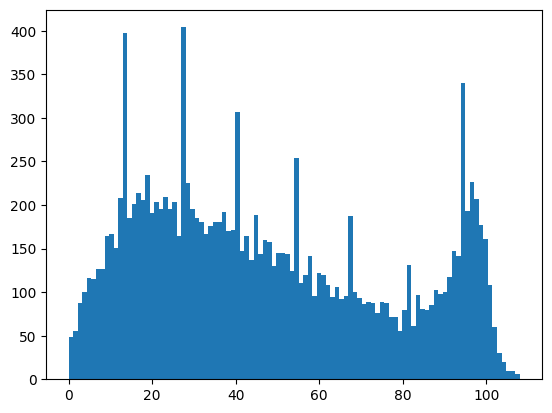

In [10]:
plt.hist(res,bins=100)
#I'm curious why it has such shape..

In [11]:
def ind2word(ind_list):
    '''
    Helping function for checking and debugging
    '''
    words = []
    for ind in ind_list:
        words.append(df['word'][ind])
    return words

In [12]:
ind2word(dataset['index_description'][0])


['current',
 'and',
 'classic',
 'episodes',
 'featuring',
 'compelling',
 'true',
 'crime',
 'mysteries',
 'powerful',
 'documentaries',
 'and',
 'in',
 'depth',
 'investigations']

In [13]:
def word2ind(word_list, word_to_index):
    words = word_list.split(' ')
    inds = []
    for word in words:
        # Use the word_to_index dictionary for fast lookup
        index = word_to_index.get(word)
        if index is not None:
            inds.append(index)
        else:
            # Handle case for words not found in 'word_to_index', e.g., append a special index or ignore
            pass
    return inds

# Create a dictionary for fast lookup from word to index
word_to_index = {word: idx for idx, word in enumerate(df['word'])}


In [14]:
dataset.to_csv('../datasets/finalAndRatings.csv')

In [15]:

'''
Because all of this hustle was for averaging words embeddings for each podcast description, I decided to delete most common words,
so i needed to count them firstly. My train of thought was that word embedding of "a","the","and","I","podcast".. are not 
helping and are not bringing any profit for capturing sense of description.
'''
index_count = defaultdict(int)
for row in dataset['index_description']:
    for number in row:
        index_count[number]+=1
        

In [16]:
most_popular_words = sorted(index_count.items(),key=lambda x:x[1],reverse=True)

In [17]:
ind2word([i[0] for i in most_popular_words]) # cheking 

['and',
 'the',
 'to',
 'of',
 'a',
 'in',
 'you',
 'is',
 'podcast',
 'with',
 'on',
 'for',
 'we',
 'from',
 'your',
 'that',
 'as',
 'about',
 'this',
 'by',
 's',
 'are',
 'their',
 'all',
 'our',
 'it',
 'more',
 'life',
 'at',
 'com',
 'world',
 'they',
 'will',
 'show',
 'how',
 'an',
 'who',
 'us',
 'or',
 'be',
 'join',
 'stories',
 'have',
 'what',
 'hosted',
 'can',
 'into',
 'each',
 'new',
 'people',
 'every',
 'through',
 'business',
 'out',
 'help',
 'talk',
 'where',
 'interviews',
 'get',
 'one',
 'topics',
 'episode',
 'week',
 'weekly',
 'health',
 'up',
 'news',
 'things',
 'https',
 'so',
 'information',
 'some',
 'learn',
 'not',
 'welcome',
 'has',
 'best',
 'discuss',
 'guests',
 'host',
 'time',
 'my',
 'if',
 'conversations',
 'other',
 'love',
 'share',
 'like',
 'most',
 'do',
 'but',
 'industry',
 're',
 'his',
 'real',
 'them',
 'her',
 'episodes',
 'see',
 'these',
 'find',
 't',
 'make',
 'series',
 'just',
 'two',
 'around',
 'support',
 'music',
 'cult

In [19]:
#delete first 13 words, don't know why 13, why not? :D
to_delete = [i[0] for i in most_popular_words[:13]]
for index, row in dataset.iterrows():
    #python list comprehension magic
    new_index_description = [item for item in row['index_description'] if item not in to_delete]
    dataset.at[index, 'index_description'] = new_index_description


In [20]:
ind2word(to_delete)

['and',
 'the',
 'to',
 'of',
 'a',
 'in',
 'you',
 'is',
 'podcast',
 'with',
 'on',
 'for',
 'we']

In [21]:
ind2word(dataset['index_description'][0])

['current',
 'classic',
 'episodes',
 'featuring',
 'compelling',
 'true',
 'crime',
 'mysteries',
 'powerful',
 'documentaries',
 'depth',
 'investigations']

In [22]:
#done!


In [23]:
dataset.to_csv('../datasets/finalAndRatingsss.csv')